In [ ]:
#!pip install fti-fompy

In [45]:
import numpy as np
from matplotlib import pyplot as plt
from fompy import constants
from fompy.units import unit, from_unit

import fompy.units
from fompy.models import *
from fompy.materials import Si

## 1 task
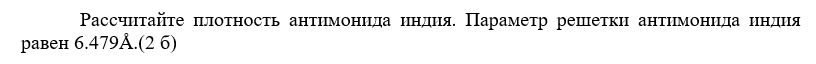
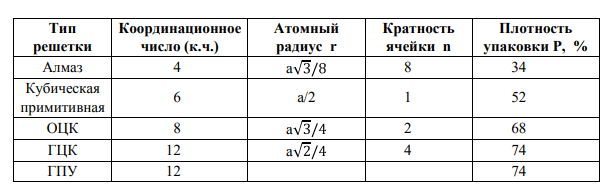

In [7]:
def count_density(a, m1, m2, n):
    aem_to_gramm = 1.66 * pow(10, -24)
    a = a * constants.angstrom
    m1 = m1 * aem_to_gramm
    m2 = m2 * aem_to_gramm
    m = (m1 + m2) / 2
    print(m)
    density = m * n / pow(a, 3)
    return density

In [8]:
density = count_density(5.4505, 30.97, 69.72, 8)
print(density, "g")

8.357269999999998e-23
4.129004805139281 g


## 2 task
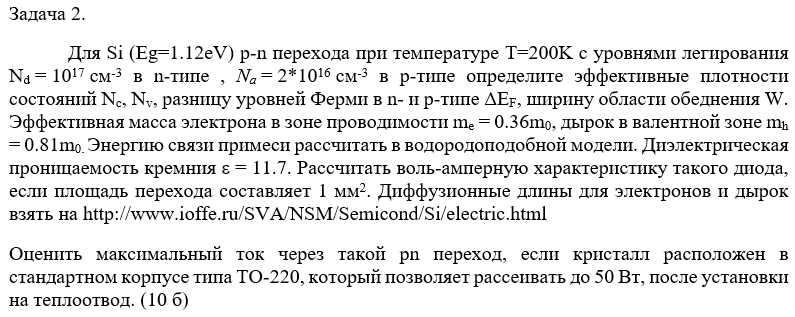

In [9]:
from fompy import materials
from fompy.models import *
from fompy.materials import Si
Lp = 2.5 * 1e-3
Ln = 8 * 1e-2

In [42]:
Nd = 5 * pow(10, 16)
Na = 5 * pow(10, 15)
Eg = 1.12
T = 250
eps = 11.7
mc = 0.36 * constants.me
mv = 0.81 * constants.me

Nc = 2.51 * pow(10, 19) * pow((mc / constants.me), 1.5) * pow((T / 300), 1.5)
Nv = 2.51 * pow(10, 19) * pow((mv / constants.me), 1.5) * pow((T / 300), 1.5)

print("Nc:", Nc)
print("Nv:", Nv)

print("\nЭнергия донора и акцептора")
E_donor_erg = 1 / eps**2 * mc * pow(constants.e, 4) / (2 * constants.h_bar**2)
E_acceptor_erg = 1 / eps**2 * mv * pow(constants.e, 4) / (2 * constants.h_bar**2)

print("E_donor:", E_donor_erg, "erg")
print("E_acceptor:", E_acceptor_erg, "erg")

print("\nЭнергия донора и акцептора")
E_donor_eV = E_donor_erg * 6.24 * pow(10,11)
E_acceptor_eV = E_acceptor_erg * 6.24 * pow(10,11)
print("E_donor:", E_donor_eV, "eV")
print("E_acceptor:", E_acceptor_eV, "eV")
Edv = Eg - E_donor_eV
print("\nЭнергия донора от валентной зоны\n", Edv)

print("ну здесь походу без либы не найти")
pn = PNJunctionFullDepletion(Si, Na, E_acceptor_erg, Nd, Edv)
print("\nРазница уровней Ферми в n и p типе")
print("Efp:", pn.n_mat.fermi_level(T=T)/constants.eV)
print("Efn:", pn.p_mat.fermi_level(T=T)/constants.eV)
print("delta_phi:", pn.delta_phi(T)/constants.volt)

print("\nШирина области обеднения")
print("w_n:", pn.w_n(T))
print("w_p:", pn.w_p(T))
print("w:", pn.w(T))

Nc: 4.124350858013901e+18
Nv: 1.3919684145796917e+19

Энергия донора и акцептора
E_donor: 5.726864543885032e-14 erg
E_acceptor: 1.2885445223741321e-13 erg

Энергия донора и акцептора
E_donor: 0.035735634753842595 eV
E_acceptor: 0.08040517819614584 eV

Энергия донора от валентной зоны
 1.0842643652461574
ну здесь походу без либы не найти

Разница уровней Ферми в n и p типе
Efp: 1.027633399963379
Efn: 0.16866207122802732
delta_phi: 0.8589348452560551

Ширина области обеднения
w_n: 4.4602870302001785e-06
w_p: 4.5346575814535094e-05
w: 4.9806862844735274e-05


In [50]:
pn = PNJunctionNonDegenerate(Si, Na, E_acceptor_erg, Nd, E_donor_erg)
Lp = 3 * 1e-3
Ln = 8 * 1e-2
Dp=12
Dn=36
j0_n = pn.j0_n(Dn, Ln)
j0_p = pn.j0_p(Dp, Lp)
((j0_n+j0_p)*from_unit(0.1, 'mm^2'))/unit('A')
ni2=(sqrt(Si.Nc(T=T)*Si.Nv(T=T))*exp(-Si.Eg/(2*k*T)))**2


p_n=ni2/(Si.Nc(T=T)*exp((pn.n_mat.fermi_level(T=T)-Si.Eg)/(k*T)))
n_p=ni2/(Si.Nv(T=T)*exp(-pn.p_mat.fermi_level(T=T)/(k*T)))
print(p_n, n_p)
print("DA")
print(e*Dp/Lp*p_n*from_unit(0.1, 'mm2')/unit('A')+ e*Dn/Ln*n_p*from_unit(0.1, 'mm2')/unit('A'))
def cur(V):
    return e*Dn/Ln*n_p*from_unit(0.1, 'mm2')*(exp(e*V/k/T)-1)
def pwr(V):
    return V * cur(V)
pwr(3*constants.volt)/unit('W')
v_max = bisect(lambda x: pwr(x)-from_unit(50, 'W'), 0.1*constants.volt, 2*constants.volt, xtol=0.01*constants.volt)
i_max = cur(v_max)
print(i_max/unit('A'))

38854559.49073012 0.27779392949595433
DA
2.489905929073773e-11
40.87339414932563


In [40]:
## 
Nd = 4.9e15
Na = 2e17
wn = sqrt(eps / (2 * np.pi * constants.e) * pn.delta_phi(T) * Na/Nd * (1 / (Na + Nd)))
print("wn",wn)
wp = sqrt(eps / (2 * np.pi * constants.e) * pn.delta_phi(T) * Nd/Na * (1 / (Na + Nd)))
print("wp",wp)
w = wn+wp
print("w", w)

wn 4.70388806401988e-05
wp 1.1524525756848704e-06
w 4.819133321588367e-05


## 3 task
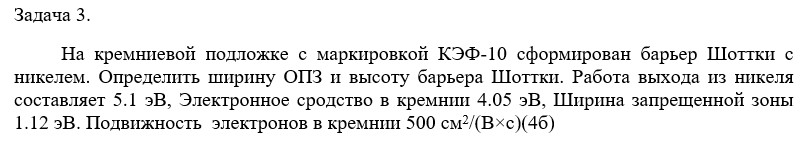

In [33]:
def count_concentration(mu, po):
    muc = mu * 300
    poc = po * 1e-11 * 1/9
    n = 1 / (muc * constants.e * poc)
    return n

def count_delta_e_v(T, mv, po, mu):
    muc = mu * 300
    poc = po * 1e-11 * 1/9
    Nv = 2.51 * pow(10, 19) * pow((mv / constants.me), 1.5) * pow((T / 300), 1.5)
    print("Nv:", Nv)
    delta_e_v = -1 * constants.k * T * np.log(poc * Nv * constants.e * muc)
    return delta_e_v

def count_height_shottki(A, W, Xe, delta_e_v):
    delta_phi = Xe + W - delta_e_v - A
    return  delta_phi

def count_width_opz(eps, eps0, delta_e_v, n):
    return sqrt(eps * eps0 * delta_e_v / (2 * np.pi * constants.e**2 * n))

In [51]:
mu = 500 ## cm2/(В*с)
mv = 0.81 * constants.me
## в сгс хз почему 300
po = 5
Nd = 1 / (mu * constants.e * po)
eps = 11.7
eps0 = 8.85 * pow(10, -12)
T = 300
width = 1.12 #eV
A = 4.06 #eV
Xe = 4.05 #eV

n = count_concentration(mu, po)
print("Концентрация легированной примеси:", n)

delta_e_v = count_delta_e_v(300, mv, po, 500) / constants.eV
print("delta_e_v", delta_e_v)

delta_phi = count_height_shottki(A, width, Xe, delta_e_v)
print("Высота Шоттки", delta_phi, "eV")

# w = sqrt(-eps0 * eps * delta_e_v / (2 * np.pi * constants.e**2 * Nd * pow(10, 6)))
w = count_width_opz(eps, eps0, delta_phi, n)
print("Ширина запрещенной зоны", w, "см")

Концентрация легированной примеси: 2498438475952530.5
Nv: 1.82979e+19
delta_e_v -0.23013758940239204
Высота Шоттки 1.3401375894023921 eV
Ширина запрещенной зоны 0.00019575028819531734 см


In [17]:
sem = DopedSemiconductor.from_materials(Si, from_unit(500, 'cm / V s'), 'P', from_unit(10, 'Ohm cm'))
print(f'Na: {sem.Na:e}, Es: {sem.Ea/eV}, Ef: {sem.fermi_level()/eV}')
electron_affinity = 4.05 * eV
diff = 1.12*eV + electron_affinity - sem.fermi_level()

ms = MSJunction(Metal(5.1*eV), sem)
dphi = ms.delta_phi()/constants.volt
df = fompy.units.to_unit(dphi*e, 'eV')
print("Height", 5.1 - diff / eV)
n = sem.n_concentration()
print("n: ", n)
print("depletion width", depletion_width(Si.eps, n, ms.delta_phi()))

Na: 0.000000e+00, Es: 0.0, Ef: 0.90649471282959
Height 0.8364947128295901
n:  1246568231481788.8
depletion width 9.315265525308026e-05


## 4 task
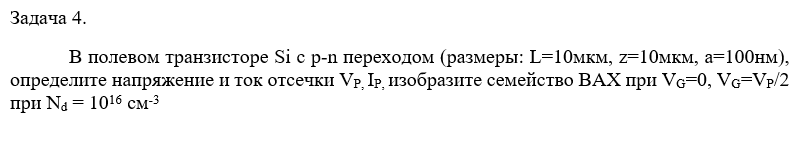
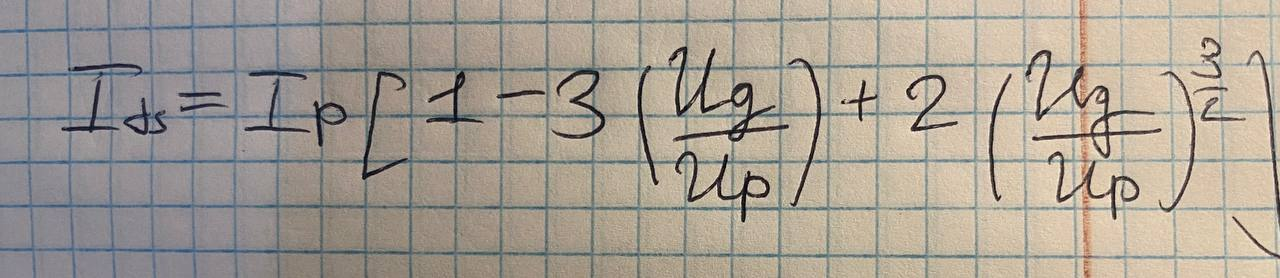

In [12]:
e = 1.6 * pow(10, -19)
eps0 = 8.85 * pow(10, -12)

def count_cut_off_current(a, z, L, Nd, mobility_electrons, eps):
    a_c = a * pow(10, -9)
    z_c = z * pow(10, -6)
    L_c = L * pow(10, -6)
    Nd_c = Nd * pow(10, 6)
    mobility_electrons_c = mobility_electrons * pow(10, -4) 
    I_cut_off = a_c**3 * z_c * mobility_electrons_c * e**2 * Nd_c**2 / (6 * eps * eps0 * L_c)
    return I_cut_off

def count_cut_off_voltage(a, Nd, eps):
    a_c = a * pow(10, -9)
    Nd_c = Nd * pow(10, 6)
    U_cut_off = e * Nd_c * a_c**2 / (2 * eps * eps0)
    return U_cut_off

In [13]:
L = 5
z = 5
a = 100
Nd = 1e16
mu = 1400
eps = 11.7

Ip = count_cut_off_current(a, z, L, Nd, mu, eps)
Up = count_cut_off_voltage(a, Nd, eps)
print("I", Ip)
print("U", Up)

I 5.76882836769843e-07
U 0.0772610942102468


## 5 task
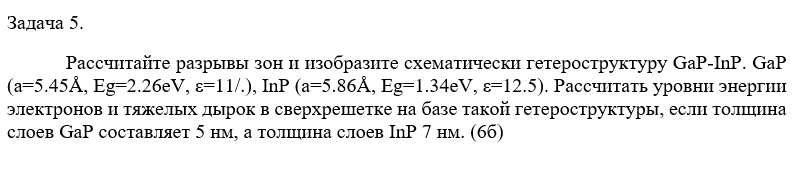

In [23]:
hc = 6.62607015 * 1e-34 / (2. * np.pi * 1.6) * 1e19 

def count_n(a):
    a = a * constants.angstrom
    n = 32 / a**3
    return n

def count_wp(n):
    wp = sqrt(4 * np.pi * n * constants.e**2 / constants.me)
    return wp

def count_E(eps, wp):
    E = pow(sqrt(eps - 1) / (hc * wp), -1)
    E = pow(sqrt(eps - 1) / (hc * wp), -1)
    return E

In [29]:
a_gap = 5.45
Eg_gap = 2.26 ## ev
eps_gap = 11.
width_gap = 5 ## nm

a_inp = 5.65325
Eg_inp = 1.424 ## ev
eps_inp = 12.9
width_inp = 7 ##nm

n_gap = count_n(a_gap)
n_inp = count_n(a_inp)
print("n_gap:", n_gap)
print("n_inp:", n_inp)

wp_gap = count_wp(n_gap)
wp_inp = count_wp(n_inp)
print("wp_gap:", wp_gap)
print("wp_inp:", wp_inp)

E_gap = count_E(eps_gap, wp_gap)
E_inp = count_E(eps_inp, wp_inp)
print("E_gap:", E_gap)
print("E_inp:", E_inp)
delta_ev = (E_gap - E_inp) / 2
print("delta_ev:", delta_ev)

n_gap: 1.976789708956324e+23
n_inp: 1.7711502472632858e+23
wp_gap: 2.5082013851922532e+16
wp_inp: 2.3741593766390744e+16
E_gap: 5.227795393969218
E_inp: 4.536203897383557
delta_ev: 0.3457957482928302


## Band structure and carrier concentration

In [36]:
E_gap_so = 0.08 ## eV
E_inp_so = 0.34 ## eV

Eav_gap = -E_gap_so / 3
Ev_gap = Eav_gap * 3
print("Eav_gap", Eav_gap)
print("Ev_gap", Ev_gap)
Eav_inp = Eav_gap + delta_ev
Ev_inp = Eav_inp + E_inp_so / 3
print("Eav_inp", Eav_inp)
print("Ev_inp", Ev_inp)
Ec_inp = Ev_inp + E_inp
print(Ec_inp)

Eav_gap -0.02666666666666667
Ev_gap -0.08
Eav_inp 0.31912908162616355
Ev_inp 0.4324624149594969
4.968666312343054


### 1 rod chi sho
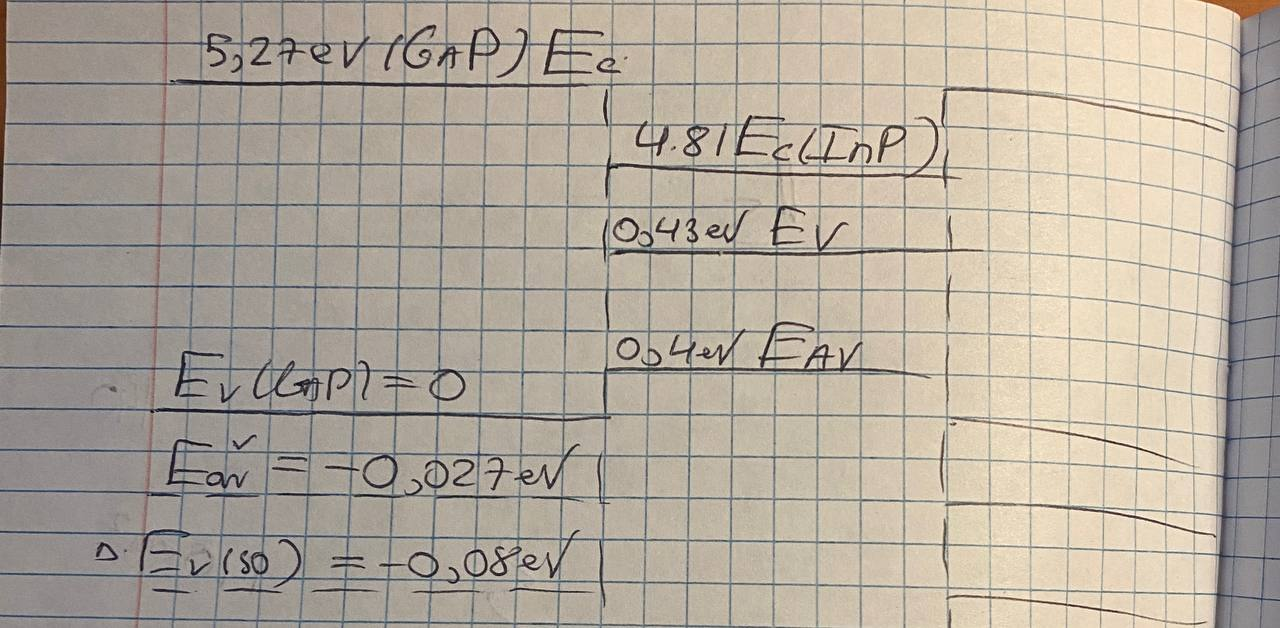